**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
import sympy as sm
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [8]:
# We define the parameters within the problem:
p, y, w, n, l, k, P1= sm.symbols('p_t y_t w \eta \ell_t \kappa_t \Pi_1')

# And define the profit function for the salon:
Profit = sm.Eq(P1, k * l**(1 - n) - w * l)

# We derive the FOC and set it equal to 0:
FOC = sm.Eq(sm.diff(k * l**(1 - n) - w * l,l),0)

# We finally solve the FOC's and isolate the expression for optimal l:
sol = sm.solve(FOC, l)
sol0 = sm.Eq(l,sol[0])

# We present the results:
print('Profit, FOC and profit maximizing employees:')
display(Profit, FOC, sol0)

Profit, FOC and profit maximizing employees:


Eq(\Pi_1, -\ell_t*w + \ell_t**(1 - \eta)*\kappa_t)

Eq(-w + \ell_t**(1 - \eta)*\kappa_t*(1 - \eta)/\ell_t, 0)

Eq(\ell_t, (\kappa_t*(1 - \eta)/w)**(1/\eta))

In [9]:
# To evaluate l_t with the baseline parameters, we define the parameters:
par_values = {
    n: 0.5,
    w: 1.0,
}

# We incorporate the baseline parameters in sol0:
sol_0_evaluated = sol0.subs(par_values)
display(sol_0_evaluated)

# We evaluate l for different values of k in {1.0,2.0}
l_values = []
k_values = np.linspace(1.0, 2.0, num=11)

# Save the values of l for different k's:
for k in k_values:
    sol = sm.solve(k * l**(1 - n) - w * l, l)
    l_values.append(sol[0].subs(par_values))

# Print the results:
for k, l_val in zip(k_values, l_values):
    print(f"For k = {k:.3f}, l = {l_val:.3f}")

Eq(\ell_t, 0.25*\kappa_t**2.0)

For k = 1.000, l = 1.000
For k = 1.100, l = 1.210
For k = 1.200, l = 1.440
For k = 1.300, l = 1.690
For k = 1.400, l = 1.960
For k = 1.500, l = 2.250
For k = 1.600, l = 2.560
For k = 1.700, l = 2.890
For k = 1.800, l = 3.240
For k = 1.900, l = 3.610
For k = 2.000, l = 4.000


interactive(children=(FloatSlider(value=1.0, description='kappa', max=2.0, min=1.0, step=0.010101010101010102)…

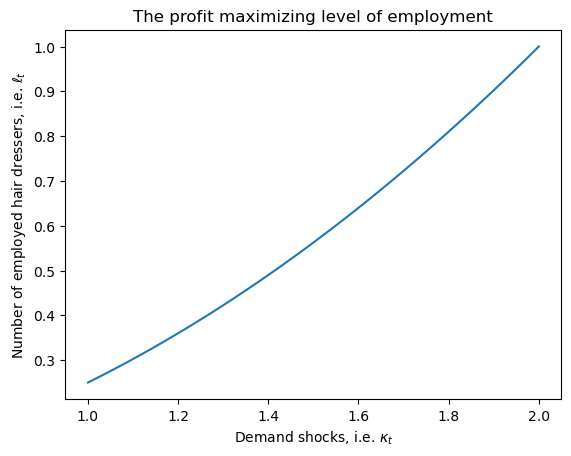

In [10]:
# We define the profit function:
def profit_func(l, kappa, eta=0.5, w=1.0):
    return kappa * l**(1 - eta) - w * l

# We define the optimal l:
def calculate_optimal_l(kappa, eta=0.50, w=1.0):
    return (((1 - eta) * kappa) / w) ** (1 / eta)

# We define different values of l and kappa: 
l_values = np.linspace(0.01, 10, num=100)
kappa_values = np.linspace(1.0, 2.0, num=100)
optimal_l_values = []

# Calculate optimal values of l, given different values of kappa:
for kappa in kappa_values:
    optimal_l = calculate_optimal_l(kappa)
    optimal_l_values.append(optimal_l)
    profit_with_maximizing_ls = profit_func(optimal_l, kappa)
    # print(f"For kappa = {kappa}, optimal l_t = {optimal_l}, maximum profit = {profit_with_maximizing_ls}")

# Plotting the profit function with kappa-widget, such that we can evaluate the maximum:
def update_plot(kappa):
    profits = profit_func(l_values, kappa)
    positive_profits_mask = profits > 0
    positive_l_values = l_values[positive_profits_mask]
    positive_profits = profits[positive_profits_mask]
    
    plt.plot(positive_l_values, positive_profits)
    plt.xlabel('l')
    plt.ylabel('Profit, i.e. $\Pi$')
    plt.title('Profit vs l for kappa = {:.2f}'.format(kappa))
    plt.grid(True)
    plt.show()

kappa_slider = widgets.FloatSlider(value=kappa_values[0], min=kappa_values[0], max=kappa_values[-1], step=(kappa_values[-1] - kappa_values[0]) / (len(kappa_values) - 1), description='kappa')

widgets.interact(update_plot, kappa=kappa_slider)
    
# Ploting of the optimal number of employees, given the level of demand shocks:
plt.plot(kappa_values, optimal_l_values)
plt.xlabel('Demand shocks, i.e. $\kappa_t$')
plt.ylabel('Number of employed hair dressers, i.e. $\ell_t$')
plt.title('The profit maximizing level of employment')
plt.show()

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [11]:
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1+0.01)**(1/12)
kappa_init = 1
T = 120

#draw epsilons
np.random.seed(1998)
epsilons = np.random.normal((0.5*sigma_epsilon**2), sigma_epsilon, (120,1))
epsilon_list = epsilons.tolist()


def kappas(kappa_init, epsilons):

    # Initialize the list with an empty array
    log_kappas = np.zeros((len(epsilons),)) 

    for i,epsilon in enumerate(epsilons):
        
        if i==0: 
            log_kappa_t = np.log(kappa_init) + epsilon
        else:
            # Calculate the autoregressive value at time t
            log_kappa_t = log_kappas[i-1] + epsilon

        # add log_kappa_t to the list of log_kappas
        log_kappas[i] = log_kappa_t

        # convert to the exponential values of log_kappa to get the kappa values
        kappas = np.exp(log_kappas)

    return kappas

kappas = kappas(kappa_init, epsilons)

In [ ]:
# create lists for t, l and kappa values
t_values = list(range(120))
l_values = []
k_values = kappas.tolist()

# calculate l values for each kappa
for kappa in kappas:
    l = (((1-eta) * kappa) / w) ** (1 / eta)
    l_values.append(l)


# initialise h values and define l in t-1
h_value = 0
l_previous = 0
for t, kappa, l in zip(t_values, k_values, l_values):
    lt = l
    indicator = 1 if lt != l_previous else 0
    h_value += R ** (-t) * (kappa * lt**(1 - eta) - w * lt - indicator * iota)
    l_previous = lt

print(h_value)

In [19]:
# To evaluate l_t with the baseline parameters, we define the parameters:
par_values = {
    n: 0.5,
    w: 1.0,
}

# We incorporate the baseline parameters in sol0:
sol_0_evaluated = sol0.subs(par_values)

# We evaluate l for different values of k in {1.0,2.0}
l_values = []
k_values = kappas.tolist()
t_values = list(range(120))

# Save the values of l for different k's:
for kappa in kappas:
    sol = sm.solve(kappa * l**(1 - n) - w * l, l)
    l_values.append(sol[0].subs(par_values))


# Print the results:
# for k_val, l_val in zip(k_values, l_values):
#     print(f"For k = {k:.3f}, l = {l_val:.3f}")

In [20]:
print(zip(k_values, l_values))


# h_value = 0
# l_previous = 0
# for i, (kappa, l) in enumerate(zip(k_values, l_values)):
#     lt = l
#     indicator = 1 if lt != l_previous else 0
#     h_value += R ** (-i) * (kappa * lt**(1 - eta) - w * lt - indicator * iota)
#     l_previous = lt
#     print(lt, l_previous, indicator)

In [22]:
def calculate_h(k_values, l_values, t_values, R=0.99917, iota=0.01, eta=0.5, w=1.0):
    h_value = 0
    l_previous = 0
    for t, kappa, l in t_values, k_values, l_values:
        lt = l
        indicator = 1 if lt != l_previous else 0
        h_value += R ** (-t) * (kappa * lt**(1 - eta) - w * lt - indicator * iota)
        l_previous = lt
        print(lt, l_previous, indicator)
    return h_value

h_value = calculate_h(k_values, l_values, t_values)
h_value

# # for k_val, l_val in zip(k_values, l_values):


# def calculate_h(kappa_series, l_series):
#     h_value = 0
#     l_previous = 0
#     for t in range(T):
#         lt = l_series[t]
#         indicator = 1 if lt != l_previous else 0
#         h_value += R ** (-t) * (kappa_series[t] * lt**(1 - eta) - w * lt - indicator * iota)
#         l_previous = lt
#     return h_value

ValueError: too many values to unpack (expected 3)

In [23]:
# Step 1: Define the parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1
T = 120

# Step 2: Define the function for calculating l_t
def calculate_lt(kappa):
    return (((1 - eta) * kappa) / w) ** (1 / eta)

# Step 3: Define the function for calculating h
def calculate_h(kappa_series, l_series):
    h_value = 0
    l_previous = 0
    for t in range(T):
        lt = l_series[t]
        indicator = 1 if lt != l_previous else 0
        h_value += R ** (-t) * (kappa_series[t] * lt**(1 - eta) - w * lt - indicator * iota)
        l_previous = lt
    return h_value

# Step 4: Calculate the approximate ex ante expected value of the salon, H
K = 1000  # Number of shock series
h_values = []
for _ in range(K):
    kappa_series = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, T)
    l_series = [calculate_lt(kappa) for kappa in kappa_series]
    h = calculate_h(kappa_series, l_series)
    h_values.append(h)

H = np.mean(h_values)

print("Approximate ex ante expected value of the salon, H:", H)

Approximate ex ante expected value of the salon, H: -1.4725828549107787


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [13]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [14]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [15]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [16]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [17]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [18]:
# write your code here